<a href="https://colab.research.google.com/github/vignes81/Stock-Analysis/blob/main/kanger%20stock.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip3 install pandas-datareader


In [2]:
!pip install --upgrade mplfinance

     |████████████████████████████████| 61kB 2.9MB/s 


### Import Libraries

In [3]:

import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
plt.style.use('fivethirtyeight')


In [4]:
import mplfinance as mpf

In [5]:
from pandas_datareader import data as web

### Import Kanger Stock Price History

In [11]:
start = datetime.datetime(2020,7,1)
end = datetime.datetime(2021,1,18)    
kanger = web.DataReader('0170.KL', 'yahoo',start,end)



In [12]:
kanger.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-07-01,0.095,0.09,0.090,0.095,7131500,0.095
2020-07-02,0.100,0.09,0.100,0.095,10090900,0.095
2020-07-03,0.095,0.09,0.090,0.090,6672700,0.090
2020-07-06,0.095,0.09,0.095,0.090,13789200,0.090
2020-07-07,0.095,0.09,0.095,0.095,6439900,0.095


In [13]:
kanger.shape

(137, 6)

In [14]:
kanger.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-01-12,0.140,0.130,0.135,0.135,43994200,0.135
2021-01-13,0.160,0.135,0.140,0.150,316054100,0.150
2021-01-14,0.155,0.145,0.155,0.145,89386300,0.145
2021-01-15,0.150,0.140,0.150,0.150,34529800,0.150
2021-01-18,0.160,0.145,0.155,0.145,104951200,0.145


### Data Visualization

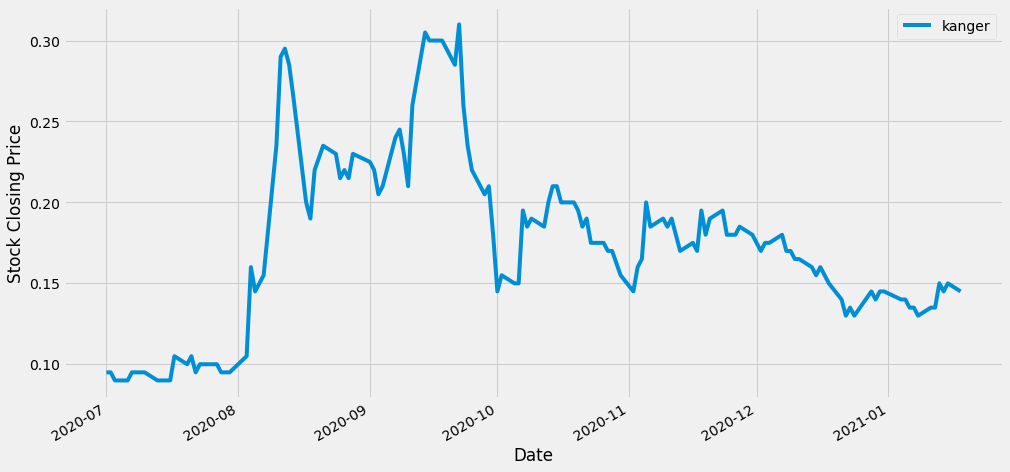

In [15]:

kanger['Close'].plot(label='kanger',figsize=(15,8))
plt.ylabel('Stock Closing Price')
plt.legend()
plt.show()

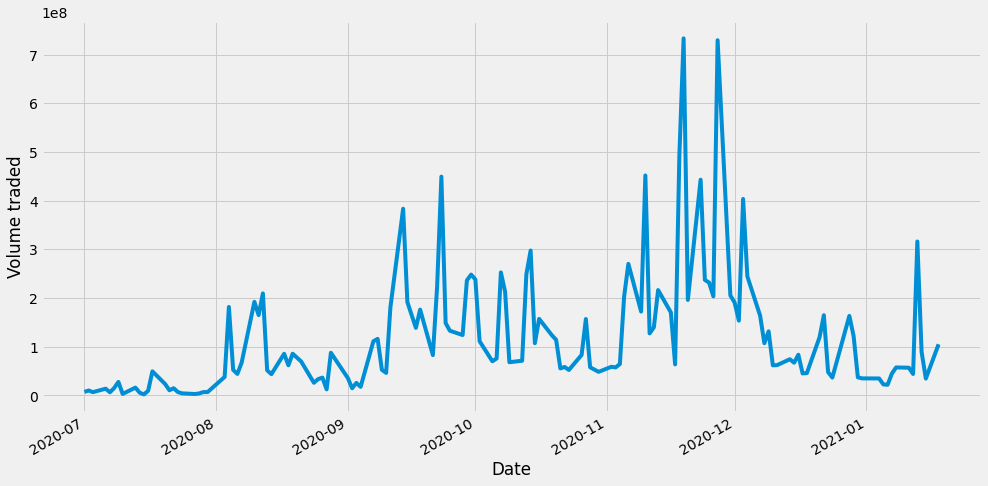

In [16]:
kanger['Volume'].plot(label= 'Volume',figsize= (15,8))
plt.ylabel('Volume traded')
plt.show()

In [17]:
kanger['Volume'].argmax()

96

In [18]:
kanger['Volume'].argmin()

10

In [24]:
kanger.iloc[[kanger['Open'].argmax()]]

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-08-12,0.32,0.18,0.32,0.295,209422500,0.295


In [19]:
kanger.iloc[[kanger['Volume'].argmax()]]

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-11-19,0.215,0.18,0.205,0.18,733199000,0.18


In [20]:
kanger.iloc[[kanger['Volume'].argmin()]]

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-07-15,0.09,0.085,0.085,0.09,1981100,0.09


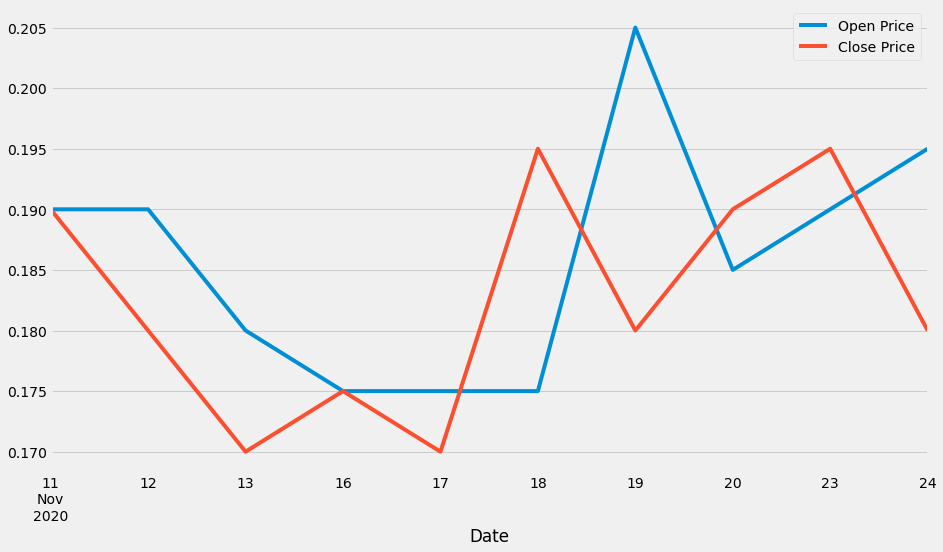

In [25]:
kanger.iloc[90:100]['Open'].plot(label= 'Open Price',figsize= (14,8))
kanger.iloc[90:100]['Close'].plot(label= 'Close Price')
plt.legend()

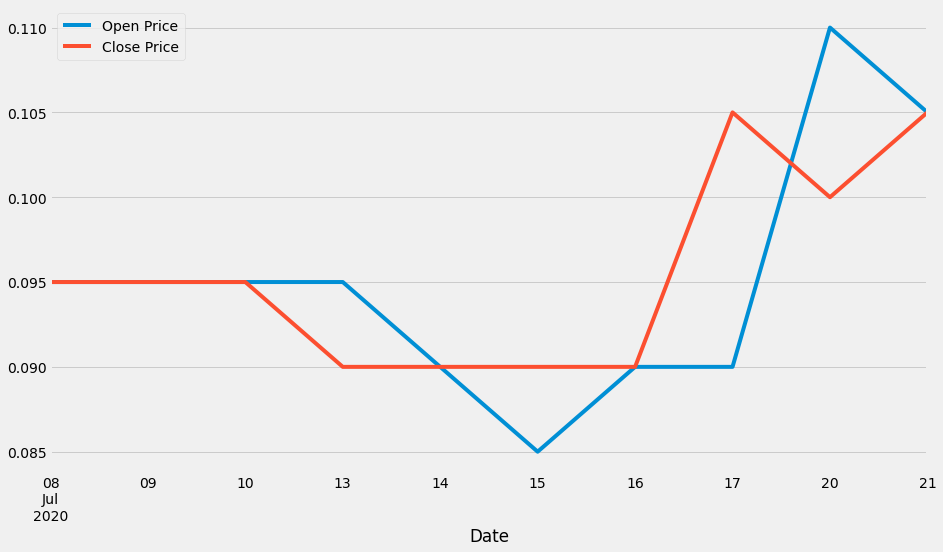

In [26]:
kanger.iloc[5:15]['Open'].plot(label= 'Open Price',figsize= (14,8))
kanger.iloc[5:15]['Close'].plot(label= 'Close Price')
plt.legend()

In [27]:
kanger['Total Traded']= kanger['Open'] * kanger['Volume']
kanger.head()


,High,Low,Open,Close,Volume,Adj Close,Total Traded
Date,,,,,,,
2020-07-01,0.095,0.09,0.090,0.095,7131500,0.095,6.418350e+05
2020-07-02,0.100,0.09,0.100,0.095,10090900,0.095,1.009090e+06
2020-07-03,0.095,0.09,0.090,0.090,6672700,0.090,6.005430e+05
2020-07-06,0.095,0.09,0.095,0.090,13789200,0.090,1.309974e+06
2020-07-07,0.095,0.09,0.095,0.095,6439900,0.095,6.117905e+05


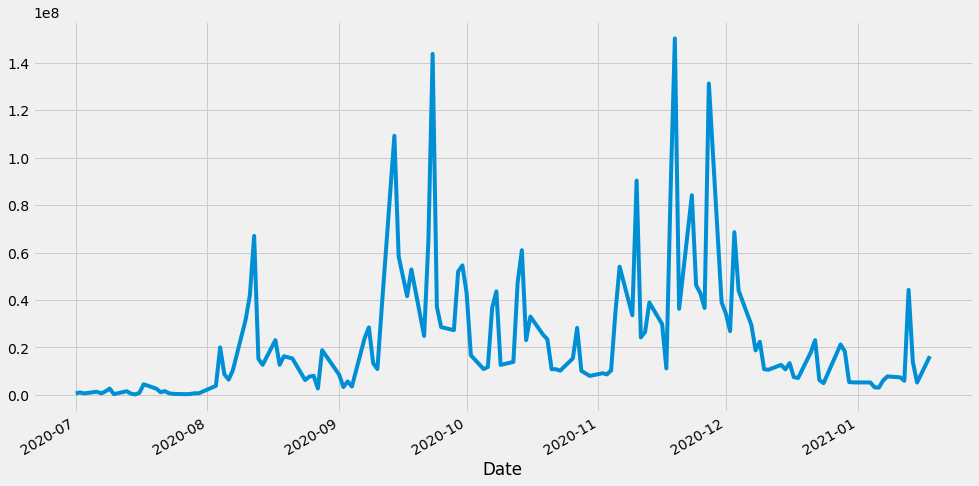

In [28]:
kanger['Total Traded'].plot(label= 'Total Traded',figsize= (15,8))

### Moving Average

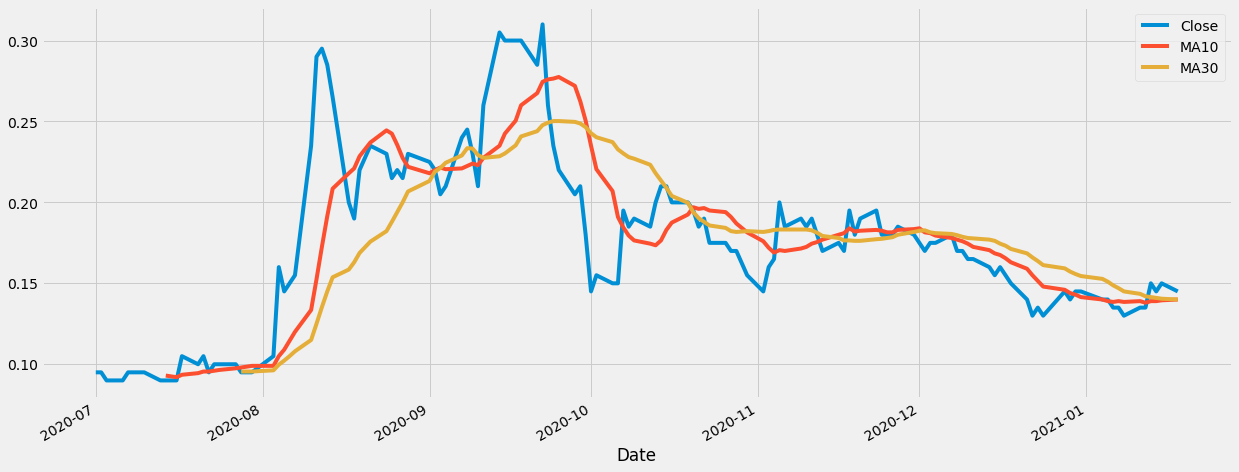

In [29]:
kanger['Close'].plot(figsize= (19,8))
kanger['MA10']= kanger['Close'].rolling(10).mean()
kanger['MA10'].plot()
kanger['MA30']= kanger['Close'].rolling(20).mean()
kanger['MA30'].plot()
plt.legend()

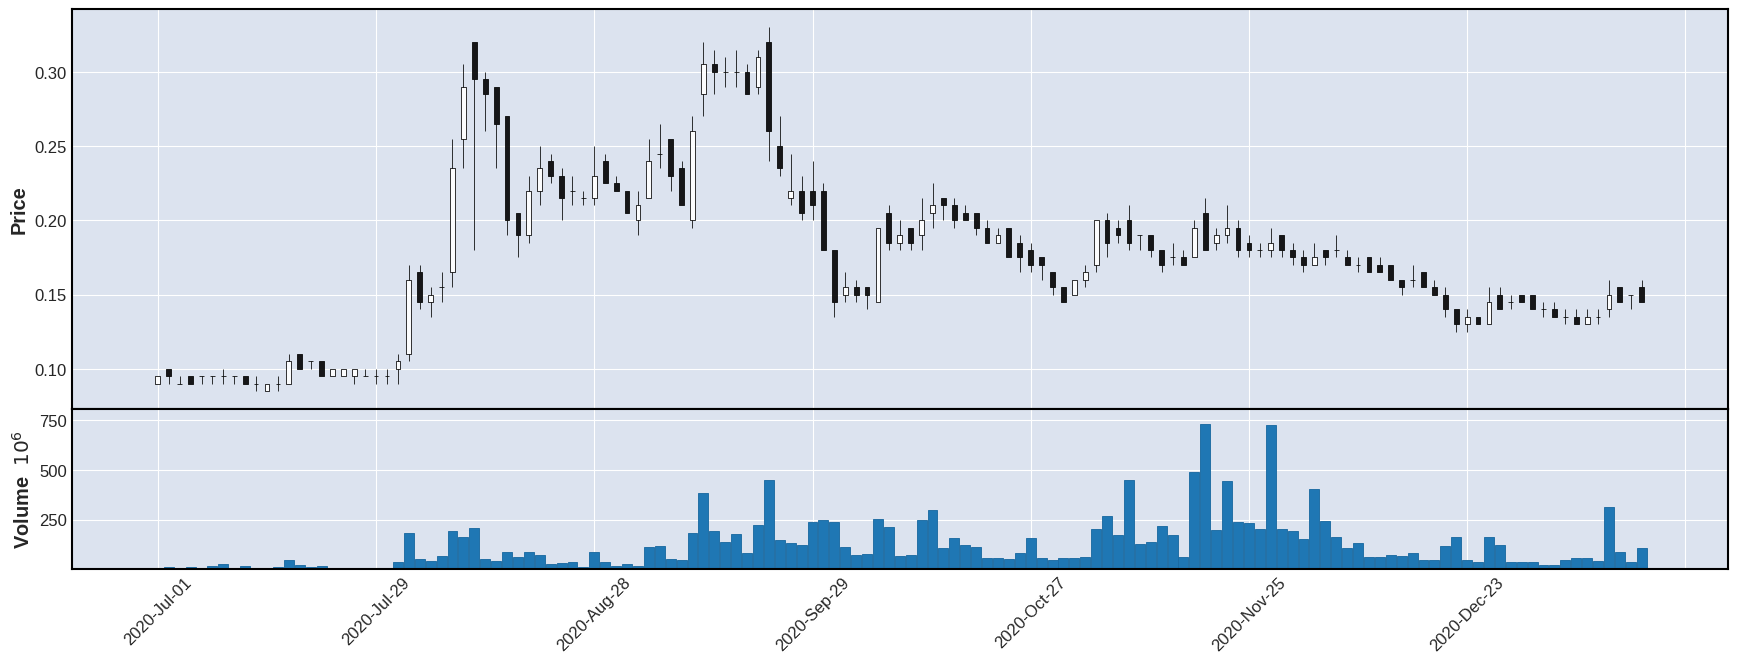

In [30]:
mpf.plot(kanger,type='candle',volume=True,figsize=(23,8))



### Daily Percentage Return

In [31]:
kanger['Returns']= kanger['Close']/kanger['Close'].shift(1)-1
kanger.head()

,High,Low,Open,Close,Volume,Adj Close,Total Traded,MA10,MA30,Returns
Date,,,,,,,,,,
2020-07-01,0.095,0.09,0.090,0.095,7131500,0.095,6.418350e+05,NaN,NaN,NaN
2020-07-02,0.100,0.09,0.100,0.095,10090900,0.095,1.009090e+06,NaN,NaN,0.000000
2020-07-03,0.095,0.09,0.090,0.090,6672700,0.090,6.005430e+05,NaN,NaN,-0.052632
2020-07-06,0.095,0.09,0.095,0.090,13789200,0.090,1.309974e+06,NaN,NaN,0.000000
2020-07-07,0.095,0.09,0.095,0.095,6439900,0.095,6.117905e+05,NaN,NaN,0.055556


In [32]:
kanger.drop(['MA10'], axis = 1,inplace=True) 

In [33]:
kanger.head()

,High,Low,Open,Close,Volume,Adj Close,Total Traded,MA30,Returns
Date,,,,,,,,,
2020-07-01,0.095,0.09,0.090,0.095,7131500,0.095,6.418350e+05,NaN,NaN
2020-07-02,0.100,0.09,0.100,0.095,10090900,0.095,1.009090e+06,NaN,0.000000
2020-07-03,0.095,0.09,0.090,0.090,6672700,0.090,6.005430e+05,NaN,-0.052632
2020-07-06,0.095,0.09,0.095,0.090,13789200,0.090,1.309974e+06,NaN,0.000000
2020-07-07,0.095,0.09,0.095,0.095,6439900,0.095,6.117905e+05,NaN,0.055556


In [34]:
kanger['Returns'].argmax()

23

In [35]:
kanger.iloc[[kanger['Returns'].argmax()]]

,High,Low,Open,Close,Volume,Adj Close,Total Traded,MA30,Returns
Date,,,,,,,,,
2020-08-04,0.17,0.105,0.11,0.16,181649000,0.16,1.998139e+07,0.09975,0.52381


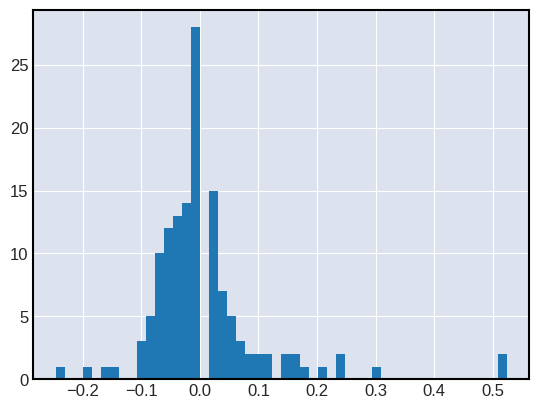

In [36]:
kanger['Returns'].hist(bins=50)

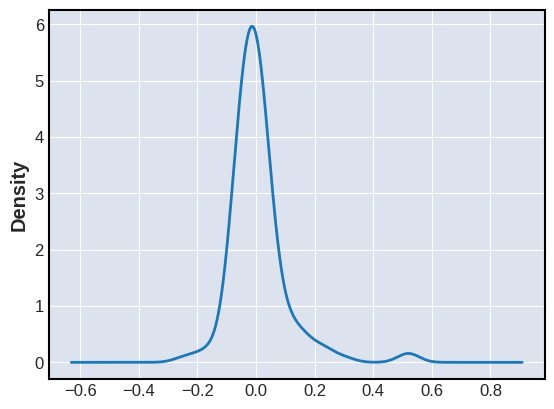

In [37]:
kanger['Returns'].plot(kind='kde')

In [38]:
# create a dataframe with 'Close' column.
data=kanger.filter(['Close'])
# convert to array
dataset=data.values
# get the number of rows to train on
training_data_len= math.ceil(len(dataset)*.8)

training_data_len

110

In [39]:
#scaled the data
scaler=MinMaxScaler(feature_range=(0,1))
scaled_data=scaler.fit_transform(dataset)

scaled_data

array([[0.02272725],
       [0.02272725],
       [0.        ],
       [0.        ],
       [0.02272725],
       [0.02272725],
       [0.02272725],
       [0.02272725],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.06818179],
       [0.04545454],
       [0.06818179],
       [0.02272725],
       [0.04545454],
       [0.04545454],
       [0.04545454],
       [0.02272725],
       [0.02272725],
       [0.02272725],
       [0.06818179],
       [0.31818179],
       [0.24999997],
       [0.27272729],
       [0.29545454],
       [0.65909089],
       [0.90909086],
       [0.93181811],
       [0.88636361],
       [0.79545447],
       [0.5       ],
       [0.45454543],
       [0.59090907],
       [0.65909089],
       [0.63636364],
       [0.56818182],
       [0.59090907],
       [0.56818182],
       [0.63636364],
       [0.61363632],
       [0.59090907],
       [0.52272725],
       [0.5454545 ],
       [0.68181814],
       [0.70454546],
       [0.636

In [42]:
# Create a training dataset
# Create a scaled training dataset
train_data=scaled_data[0:training_data_len,:]
#Split the into x_train and y_train data sets
x_train=[]
y_train=[]

for i in range(60, len(train_data)):
  x_train.append(train_data[i-60:i,0])
  y_train.append(train_data[i,0])
  if i<=60:
    print(x_train)
    print(y_train)
    print()

[array([0.02272725, 0.02272725, 0.        , 0.        , 0.02272725,
       0.02272725, 0.02272725, 0.02272725, 0.        , 0.        ,
       0.        , 0.        , 0.06818179, 0.04545454, 0.06818179,
       0.02272725, 0.04545454, 0.04545454, 0.04545454, 0.02272725,
       0.02272725, 0.02272725, 0.06818179, 0.31818179, 0.24999997,
       0.27272729, 0.29545454, 0.65909089, 0.90909086, 0.93181811,
       0.88636361, 0.79545447, 0.5       , 0.45454543, 0.59090907,
       0.65909089, 0.63636364, 0.56818182, 0.59090907, 0.56818182,
       0.63636364, 0.61363632, 0.59090907, 0.52272725, 0.5454545 ,
       0.68181814, 0.70454546, 0.63636364, 0.5454545 , 0.77272722,
       0.97727275, 0.9545455 , 0.9545455 , 0.9545455 , 0.88636361,
       1.        , 0.77272722, 0.65909089, 0.59090907, 0.52272725])]
[0.5454545023520129]



In [43]:
# convert the x_train and y_train to numpy array
x_train,y_train=np.array(x_train),np.array(y_train)


In [44]:
# Reshape the data
x_train=np.reshape(x_train,(x_train.shape[0], x_train.shape[1],1))
x_train.shape

(50, 60, 1)

In [45]:
# Build the LSTM model
model=Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [46]:
#compile the model
model.compile(optimizer='adam', loss='mean_squared_error')



In [47]:
# Train the model
model.fit(x_train,y_train,batch_size=1, epochs=1)

50/50 [==============================] - 4s 24ms/step - loss: 0.0301


In [48]:
# Create the testing data set
# Create a new array containing scaled values from the index
test_data=scaled_data[training_data_len -60:, :]
# Create the data ses x_test and y_test
x_test=[]
y_test=dataset[training_data_len:, :]
for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i, 0])

In [49]:
# convert the data to numpy array
x_test=np.array(x_test)

In [50]:
# reshape the data
x_test=np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))


In [51]:
# Get the model predicted price values
predictions=model.predict(x_test)
predictions=scaler.inverse_transform(predictions)

In [52]:
# Get the root mean squared error(RMSE)
rmse=np.sqrt(np.mean(predictions-y_test )**2)
rmse

0.006082453661494785

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


<function matplotlib.pyplot.show>

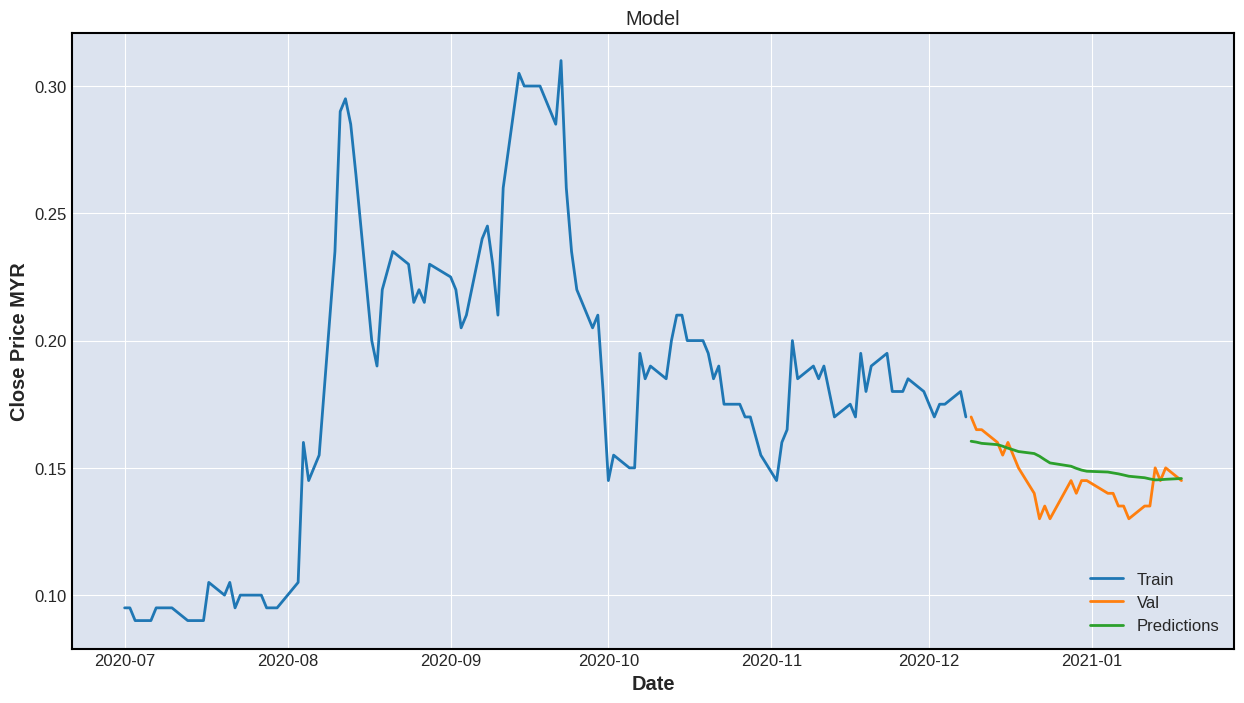

In [53]:
# Plot the data
train=data[:training_data_len]
valid=data[training_data_len:]
valid['Predictions']=predictions

#Visualize the data
plt.figure(figsize=(15,8))
plt.title('Model')
plt.xlabel('Date')
plt.ylabel('Close Price MYR')
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train','Val', 'Predictions'], loc='lower right')
plt.show

In [54]:
# show the valid and predicted prices
valid

,Close,Predictions
Date,,
2020-12-09,0.170,0.160447
2020-12-10,0.165,0.160106
2020-12-11,0.165,0.159627
2020-12-14,0.160,0.159119
2020-12-15,0.155,0.158497
2020-12-16,0.160,0.157735
2020-12-17,0.155,0.157093
2020-12-18,0.150,0.156410
2020-12-21,0.140,0.155624
